#Individual Work

Imported Data from DataScientistData.xlsx into a Dataframe named result.The State column is stripped to remove empty spaces.Also converted Education column to upper case.
Please Note:
1. Please run the code in the given order one by one.
2. The plotly package is used to generate most of the graphs. The package needs authentication to run and even view maps.The instructions to get api_key to see the graphs is provided inline with the code. 

In [1]:
import pandas as pd
result=pd.read_excel('DataScientistData.xlsx','Sheet1')#'Sheet1' matches exactly the sheet that we want to open. 
result['State']=result.State.str.strip()
result['Education']=result.Education.str.upper()
#result

(1) The below code is used to create a bar chart which can be used to analyse the average salary for Data Scientist roles in different states of USA 

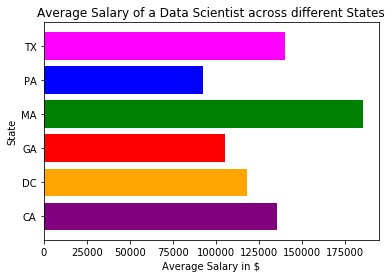

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

analysis1=result.groupby(['State']).mean()>0 # Group by State and calculate mean.Consider records with avg >0
analysis1=result.loc[result['Salary'] != 0] # Eliminating records with Salary=0
analysis2=analysis1.groupby(['State'])['Salary'].mean().to_dict() # converting to dictionary

plt.barh(range(len(analysis2)), list(analysis2.values()), align='center',color=['purple','orange', 'red', 'green', 
                                                                                'blue', 'magenta'])
plt.yticks(range(len(analysis2)), list(analysis2.keys()))
plt.xlabel("Average Salary in $")
plt.ylabel("State")
plt.title("Average Salary of a Data Scientist across different States")
plt.show()

In [5]:
# plotly library asks for authentication to display the graphs everytime we reopen the file.
# The below command must be run for every new session with username and api_key values.We have to regenerate the api_key
#and paste the new api_key in the below command. The link to get the api key is https://plot.ly/settings/api. Username: rpaturi93,
#password=Deloitte@2019

import plotly 
plotly.tools.set_credentials_file(username='rpaturi93', api_key='jCLFvhIwCYbNM9tzOjL0')

(2) The below code is used to create a bar chart which can be used to analyse the skills that are of High demand,Moderate
demand, reduced demand and very low demand in industry of Data Scientist job market. Assumed the categories as High, Moderate, Reduced and Very less based the skill requirement for number of jobs.

In [6]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import collections
from itertools import chain
from collections import Counter

skill_sets=result['Skill Set']
skills=[]
for i in range(len(skill_sets)):
    strip_list=[s.strip() for s in str(skill_sets[i]).split(",")]
    skills.append(strip_list) 
skill_items2 = list(chain(*skills))
skill_items2 = [x for x in skill_items2 if str(x) != 'nan']
freq = Counter(skill_items2)

#using plotly package to plot most common skills from the Dataset
sorted_freq_list = sorted(freq.items(), key=lambda kv: kv[1],reverse=True)
sorted_freq_dict = collections.OrderedDict(sorted_freq_list)
Colors_Df=pd.DataFrame(data=sorted_freq_list,columns=['Skill','No. of Jobs'])
Colors_Df['Group']=' '
colors={'High Demand': 'red',
          'Moderate Demand': 'orange',
          'Reduced Demand': 'lightgreen',
          'Very Less Demand': 'darkgreen'}
for i in range(len(Colors_Df['No. of Jobs'])):
     if Colors_Df['No. of Jobs'][i] >25:
        Colors_Df['Group'][i]='High Demand'
     elif Colors_Df['No. of Jobs'][i] <=25 and Colors_Df['No. of Jobs'][i] >7:
                          Colors_Df['Group'][i]='Moderate Demand'
     elif Colors_Df['No. of Jobs'][i] <=7 and Colors_Df['No. of Jobs'][i] >3:
                          Colors_Df['Group'][i]='Reduced Demand'
     else:
          Colors_Df['Group'][i]='Very Less Demand'
#print(Colors_Df)
bars=[]
for label, label_df in Colors_Df.groupby('Group'):
    bars.append(go.Bar(x=label_df['Skill'],
                       y=label_df['No. of Jobs'],
                       name=label,
                       marker={'color': colors[label]}))
layout = go.Layout(
    title='Skills needed for Data Scientist roles',
    xaxis=dict(
        title='Skill',
        tickfont=dict(
            size=15,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='No. of jobs',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)
go.FigureWidget(data=bars,layout=layout)
#bars

C:\Users\Vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice f

FigureWidget({
    'data': [{'marker': {'color': 'red'},
              'name': 'High Demand',
              't…

(3) The purpose of below program is to get the Latitude and Longitude positions of different cities in our data.
This code needs the geopy library installed for it to run.

In [8]:
import pandas as pd
from geopy.geocoders import Nominatim

analysis=result.groupby(['City'])['Job Title'].count()
k=analysis.to_dict()
City_list=k.keys()
Count_of_Jobs=k.values()
data_tuples = list(zip(City_list,Count_of_Jobs))
df = pd.DataFrame(data_tuples,columns=['City','No. of Jobs'])
#print(df)
cities = k
geolocator = Nominatim()
lon=[]
lat=[]
for key in City_list:
    loc = geolocator.geocode(key)
    lon.append(loc.longitude)
    lat.append(loc.latitude)
df['lon']=lon
df['lat']=lat

C:\Users\Vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



(4) The below code is used to generate a plot the cities of USA where Datascientist jobs are available.
It is used to analyse the concentrations of Datascientist jobs in different cities of USA. The saturation matrix indicates
the colors of the cities. Its near to blue if more number of jobs are available in that particular city.

In [9]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
df['text'] = df['City'] + ':' + df['No. of Jobs'].astype(str)
data = [ go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['lon'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            #colorscale = scl,
            cmin = 0,
            color = df['No. of Jobs'],
            cmax = df['No. of Jobs'].max(),
            colorbar=dict(
                title=""
            )
        ))]

layout = dict(
        title = 'Cities with Data Scientist Jobs<br>(Hover for city names and number of jobs)', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data=data, layout=layout )
py.iplot(fig)

(5) The below code is used to generate a heatmap of USA country which is used to analyse the concentrations of Datascientist jobs 
in different states of USA.

In [10]:
import plotly.plotly as py
from plotly.graph_objs import *

analysis4=result.groupby(['State'])['Job Title'].count()
k=analysis4.to_dict()
States=list(k.keys())
Counts=list(k.values())
trace1 = {
  "z":Counts,
  "autocolorscale": False, 
  "colorbar": {"title": "Saturation Matrix"}, 
  "locationmode": "USA-states", 
  "locations": States,
  "type": "choropleth"
}
data = Data([trace1])
layout = {
  "geo": {
    "lakecolor": "rgb(66,165,245)", 
    "projection": {"type": "albers usa"}, 
    "scope": "usa", 
  }, 
  "title": "Data Scientists Job postings in different states of USA(Hover over for more info)"
}
fig = Figure(data=data, layout=layout)
py.iplot(fig)
#plot_url = py.plot(fig)

C:\Users\Vamsi\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




(6) The below code is used to create a barchart, used to analyse the number of Datascientist jobs in comparison with other jobs like Data Analyst, Business Analyst etc. in different states

In [11]:
# Data Scientists versus other Data jobs
result_all_data=pd.read_excel('612_dataframe.xlsx','Sheet1')#'Sheet1' matches exactly the sheet that we want to open. 
result_all_data=result_all_data.apply(lambda x:x.str.strip() if x.dtype=="object" else x)

#creating two dataframes, one with data scientist roles and the other with other job roles.
analysis5=result_all_data[result_all_data['Job Title'].str.contains("Data Scientist|data scientist|Data Science|DATA SCIENTIST")]
analysis6=result_all_data[~result_all_data['Job Title'].str.contains("Data Scientist|data scientist|DATA SCIENTIST|Data Science")]

#grouping the records based on States and counting the number of jobs
temp=analysis5.groupby(['State'])['Job Title'].count()
temp=temp.to_dict() # converting to dictionary objects
temp3=analysis6.groupby(['State'])['Job Title'].count()
temp3=temp3.to_dict() # converting to dictionary objects

sorted_freq_list1 = sorted(temp.items(), key=lambda kv: kv[1],reverse=True) # sorting the list
sorted_freq_dict1 = collections.OrderedDict(sorted_freq_list1)

State_list=sorted_freq_dict1.keys()
Count_of_Jobs_DS=sorted_freq_dict1.values()

data_tuples = list(zip(State_list,Count_of_Jobs_DS)) # converting the tuples into list
df = pd.DataFrame(data_tuples,columns=['State','No. of Data Scientist Jobs'])
df=df[~df['State'].str.contains("United States")] # filtering records with United States in the state column
df=df.head(15) # getting the top 15 records

sorted_freq_list2 = sorted(temp3.items(), key=lambda kv: kv[1],reverse=True)
sorted_freq_dict2 = collections.OrderedDict(sorted_freq_list2)

data_tuples2 = list(zip(sorted_freq_dict2.keys(),sorted_freq_dict2.values()))
df2 = pd.DataFrame(data_tuples2,columns=['States with Data Jobs','No. of Data Jobs'])
df2=df2[~df2['States with Data Jobs'].str.contains("United States")]
df2=df2.head(15)

#plotting the graph
trace1 = go.Bar(
    x=df2['States with Data Jobs'],
    y=df2['No. of Data Jobs'],
    textposition = 'auto',
    name='Other Data jobs',
    marker=dict(
        color='rgb(26, 118, 255)',
        line=dict(
            color='rgb(29,48,107)',
            width=1.5),
        ),
)

trace2 = go.Bar(
    x=df['State'],
    y=df['No. of Data Scientist Jobs'],
    textposition = 'auto',
    name='Data Scientist',
    marker=dict(
        color='rgb(55, 83, 109)',
        line=dict(
            color='rgb(55, 83, 109)',
            width=1.5),
        ),
)

data = [trace1,trace2]
layout = go.Layout(
    title='Number of Jobs in different States: Data Scientist vs Other Data Jobs',
    xaxis=dict(
        title='State',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='No. of jobs',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

(7) The below code is used to generate a heat map of a pivot table showing the number of jobs
with different experience requirements in different states.

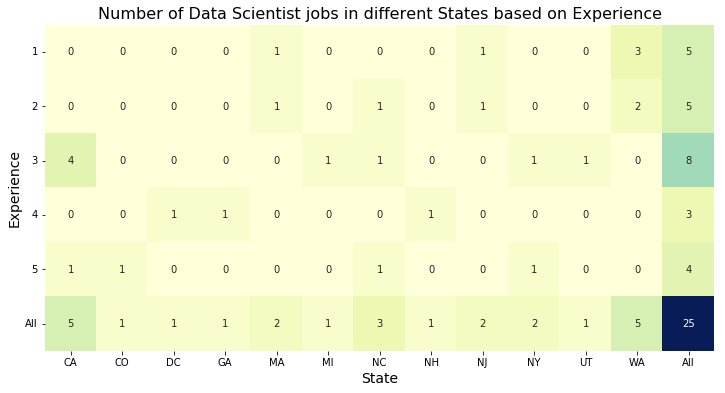

In [12]:
# Pivot table states,experience- salary
import seaborn as sns
import matplotlib.pyplot as plt

filtered_result=result.loc[result['Experience'] != 0]
fig, ax = plt.subplots(figsize=(12,6))

# heatmap of pivot table
ax=sns.heatmap(pd.crosstab(filtered_result['Experience'],filtered_result['State'],margins=True),
            cmap="YlGnBu",annot=True, cbar=False)

ax.set_title('Number of Data Scientist jobs in different States based on Experience', fontsize=16, fontdict={})
plt.xticks(fontsize="10")
plt.xlabel("State",fontsize="14")
plt.yticks(rotation=0, fontsize="10", va="center")
plt.ylabel("Experience",fontsize="14")
plt.show()
